In [4]:
# ✅ Task 2: Customer Segmentation Using K-Means
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# 1. Load dataset
data = pd.read_csv("Mall_Customers.csv")
print("✅ Dataset Loaded Successfully!\n")
print(data.head())

✅ Dataset Loaded Successfully!

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [5]:
# 2. Select relevant features
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]

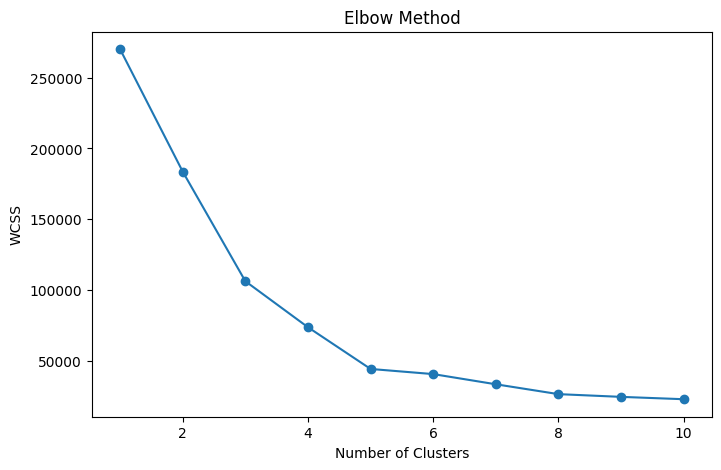

In [6]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [7]:
# 4. Train KMeans with 5 clusters
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
data['Cluster'] = kmeans.fit_predict(X)

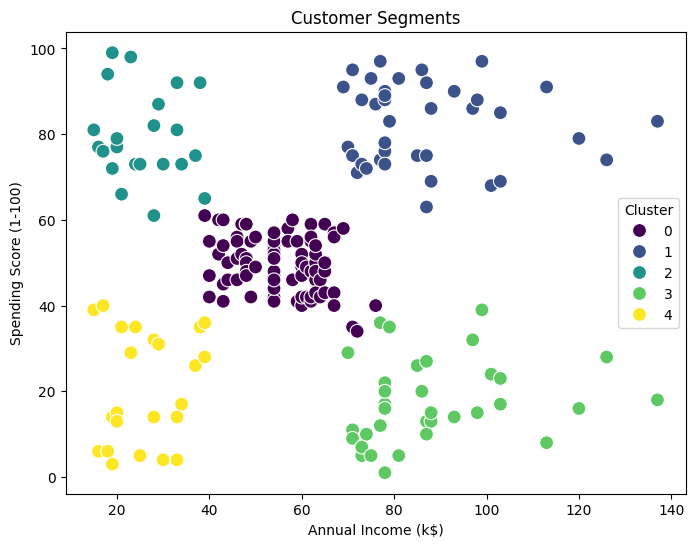

In [8]:
# 5. Visualize clusters
plt.figure(figsize=(8,6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)',
                hue='Cluster', data=data, palette='viridis', s=100)
plt.title('Customer Segments')
plt.show()

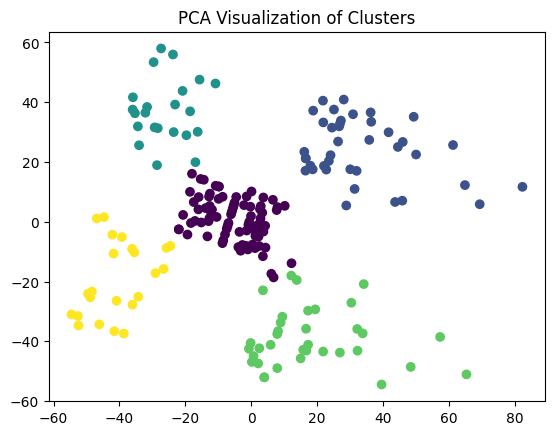

In [9]:
# 6. PCA Visualization (optional)
pca = PCA(n_components=2)
pca_data = pca.fit_transform(X)
plt.scatter(pca_data[:,0], pca_data[:,1], c=data['Cluster'], cmap='viridis')
plt.title('PCA Visualization of Clusters')
plt.show()

In [10]:
# 7. Display cluster statistics
for i in range(5):
    cluster_data = data[data['Cluster'] == i]
    print(f"\nCluster {i}:")
    print(cluster_data[['Annual Income (k$)', 'Spending Score (1-100)']].describe())


Cluster 0:
       Annual Income (k$)  Spending Score (1-100)
count           81.000000               81.000000
mean            55.296296               49.518519
std              8.988109                6.530909
min             39.000000               34.000000
25%             48.000000               44.000000
50%             54.000000               50.000000
75%             62.000000               55.000000
max             76.000000               61.000000

Cluster 1:
       Annual Income (k$)  Spending Score (1-100)
count           39.000000               39.000000
mean            86.538462               82.128205
std             16.312485                9.364489
min             69.000000               63.000000
25%             75.500000               74.500000
50%             79.000000               83.000000
75%             95.000000               90.000000
max            137.000000               97.000000

Cluster 2:
       Annual Income (k$)  Spending Score (1-100)
count         